<a href="https://colab.research.google.com/github/uiliannunes/SPOTIFY_DATA/blob/main/spotify_etl_artists_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🎵 Spotify ETL Pipeline - Artistas Específicos

Pipeline completo de ETL usando a API do Spotify, focado em artistas específicos.
Este notebook coleta músicas de artistas específicos e salva os resultados.


## 🔐 1. Autenticação e Setup

In [2]:
# 1) Instalar dependências
!pip install --quiet spotipy==2.25.1 pyspark==3.4.1 pandas pyarrow
print('Dependências instaladas')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.9/339.9 kB 24.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-spark-connect 0.8.3 requires pyspark[connect]~=3.5.1, but you have pyspark 3.4.1 which is incompatible.
Dependências instaladas


In [3]:
# 2) Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 3) Configurar paths no Drive
import os
DRIVE_BASE = '/content/drive/MyDrive/DATA_ENG/SPOTIFY_DATA'
OUTPUT_CSV = os.path.join(DRIVE_BASE, 'output', 'csv')
OUTPUT_PARQUET = os.path.join(DRIVE_BASE, 'output', 'parquet')
os.makedirs(OUTPUT_CSV, exist_ok=True)
os.makedirs(OUTPUT_PARQUET, exist_ok=True)
print('Output CSV path:', OUTPUT_CSV)
print('Output Parquet path:', OUTPUT_PARQUET)

Output CSV path: /content/drive/MyDrive/DATA_ENG/SPOTIFY_DATA/output/csv
Output Parquet path: /content/drive/MyDrive/DATA_ENG/SPOTIFY_DATA/output/parquet


In [5]:
# 4) Autenticação com SPOTIFY

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from google.colab import userdata

client_id = userdata.get('SPOTIPY_CLIENT_ID')
client_secret = userdata.get('SPOTIPY_CLIENT_SECRET')

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
))

print("Autenticação Spotify bem-sucedida! ✅")


Autenticação Spotify bem-sucedida! ✅


## 🎤 2. Extração de Tracks por Artista

In [6]:
# 5) Consumo dos dados

# Lista de artistas (exemplo: global + BR)
artists = [
    "Coldplay", "The Weeknd", "Imagine Dragons", "Taylor Swift", "Ed Sheeran",
    "Anitta", "Jorge & Mateus", "Luan Santana", "Marília Mendonça", "Melim"
]

tracks_data = []

for artist in artists:
    results = sp.search(q=f"artist:{artist}", type="track", limit=10)
    for track in results["tracks"]["items"]:
        tracks_data.append({
            "artist": artist,
            "track_name": track["name"],
            "track_id": track["id"],
            "album": track["album"]["name"],
            "release_date": track["album"]["release_date"],
            "popularity": track["popularity"]
        })

df_tracks = pd.DataFrame(tracks_data)
print(f"Total de faixas coletadas: {len(df_tracks)}")
df_tracks.head()


Total de faixas coletadas: 91


,artist,track_name,track_id,album,release_date,popularity
0,Coldplay,Sparks,7D0RhFcb3CrfPuTJ0obrod,Parachutes,2000-07-10,90
1,Coldplay,Paradise,6nek1Nin9q48AVZcWs9e9D,Mylo Xyloto,2011-10-24,84
2,Coldplay,A Sky Full of Stars,0FDzzruyVECATHXKHFs9eJ,Ghost Stories,2014-05-16,85
3,Coldplay,Something Just Like This,6RUKPb4LETWmmr3iAEQktW,Memories...Do Not Open,2017-04-07,86
4,Coldplay,The Scientist,75JFxkI2RXiU7L9VXzMkle,A Rush of Blood to the Head,2002-08-27,88


## 💾 3. Salvando Resultados

In [13]:
# 6) Salvando os arquivos CSV e Parquet no Drive

DRIVE_BASE = '/content/drive/MyDrive/DATA_ENG/SPOTIFY_DATA/output'

output_csv = os.path.join(DRIVE_BASE, "csv/spotify_tracks_artists.csv")
output_parquet = os.path.join(DRIVE_BASE, "parquet/spotify_tracks_artists.parquet")

df_tracks.to_csv(output_csv, index=False)
df_tracks.to_parquet(output_parquet, index=False)

print("Arquivos salvos com sucesso:")
print(output_csv)
print(output_parquet)


Arquivos salvos com sucesso:
/content/drive/MyDrive/DATA_ENG/SPOTIFY_DATA/output/csv/spotify_tracks_artists.csv
/content/drive/MyDrive/DATA_ENG/SPOTIFY_DATA/output/parquet/spotify_tracks_artists.parquet


## 📊 4. Visualização de Popularidade Média

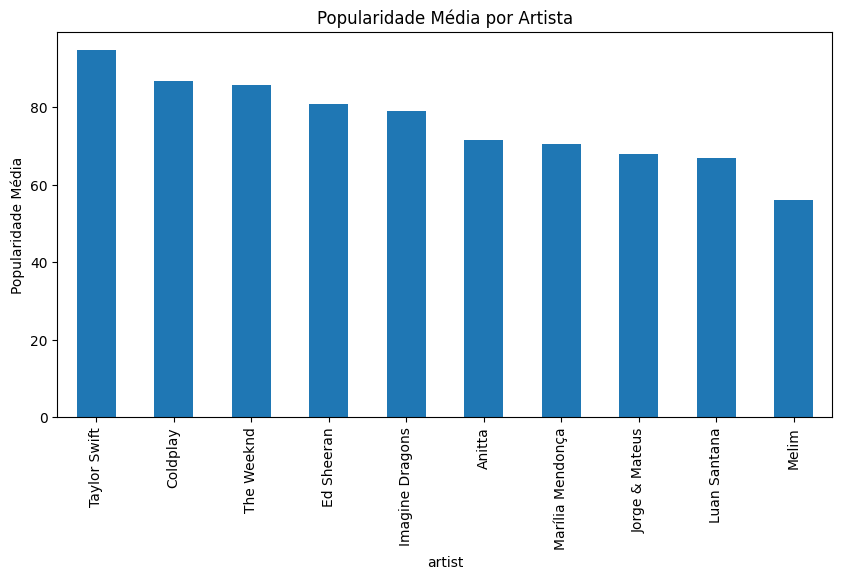

In [14]:
# 7) Gerando gráfico exemplo de média de popularidade

import matplotlib.pyplot as plt

df_plot = df_tracks.groupby("artist")["popularity"].mean().sort_values(ascending=False)
df_plot.plot(kind="bar", figsize=(10,5), title="Popularidade Média por Artista")
plt.ylabel("Popularidade Média")
plt.show()
